# Exercise 9

Related Notes:
- Chapter_09_Object_Oriented_Programming

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/njc-cz2-2021/Materials/blob/main/Exercises/Exercise_09_Object_Oriented_Programming.ipynb) 

## Exercise 9.1

Consider the following code:

```python
class a():
    def x(self):
        return "a.x"
    def y(self):
        return "a.y"
    def z(self):
        return "a.z"

class b(a):
    def y(self):
        return "b.y"
    def z(self):
        return super().z()

class c(b):
   def x(self):
	    return "c.x"
   def z(self):
       return super().z()

aaa = a()
bbb = b()
ccc = c()
```

State the output for the following segments of code: 

1.	`print(aaa.x())`
2.	`print(aaa.y())`
3.	`print(aaa.z())`
4.	`print(bbb.x())`
5.	`print(bbb.y())`
6.	`print(bbb.z())`
7.	`print(ccc.x())`
8.	`print(ccc.y())`
9.	`print(ccc.z())`

In [ ]:
#YOUR_CODE_HERE

## Exercise 9.2

Using UML, design classes for the following quadrilaterals:
- Trapezium
- Parallelogram
- Kite
- Rhombus
- Rectangle
- Square
		
The objective of these classes is to be able to calculate the area and perimeter of any instantiation of the above quadrilaterals. 

Your design should utilise inheritance and polymorphism to ensure maximal code-reuse.

Now implement all the above classes.


In [36]:
from math import sin, cos, sqrt, pi


class Quadrilateral():
    '''Assuming all angles are in radians, lengths and angles are named in a clockwise order, with angle 1 being the angle between length1 and length4'''
    
    def validate_angles(self):
        if sum(self.angles) != 2*pi: raise Exception("Invalid Quadrilateral: Angles must sum to 2pi")
    
    def __init__(self, length1: float, length2: float, length3: float, length4: float, 
                 angle1: float, angle2: float, angle3: float, angle4: float):
        self.lengths = [length1, length2, length3, length4]
        self.angles = [angle1, angle2, angle3, angle4]
        self.validate_angles()
        #self.perimeter = sum(self.lengths)
        if self.perimeter != 2*pi: raise Exception("Invalid Quadrilateral: Angles must sum to 2pi")
        

    @property
    def perimeter(self):
        return sum(self.lengths)
    
    @property
    def area(self):
        l1, l2, l3, l4, a1, a2, a3, a4 = *self.lengths, *self.angles
        s = self.perimeter / 2
        return sqrt((s-l1)*(s-l2)*(s-l3)*(s-l4)-(l1*l2*l3*l4*(cos((a1+a3)/2)**2)))
    
    
    def __str__(self):
        return f"[lengths={str(self.lengths)}, angles={str(self.angles)}, area={self.area}, perimeter={self.perimeter}]"
    

class Trapezium(Quadrilateral):
    "No difference with Quadrilateral class"
    pass

class Parallelogram(Quadrilateral):
    def __init__(self, length1: float, length2: float, angle1: float):
        self.lengths = [length1, length2, length1, length2]
        self.angles = [angle1, pi - angle1, angle1, pi - angle1]
        if angle1 >= pi: raise Exception("Invalid Parallelogram: Angles must >0 and <pi")
        self.validate_angles()
        #self.perimeter = sum(self.lengths)
        #self.area = length1 * length2 * sin(angle1)

class Kite(Quadrilateral):
    def __init__(self, length1: float, length2: float, angle1: float, angle3: float):
        "uses the 2 unique lengths and opposite and non-equal angles to compute the area"
        self.lengths = [length1, length2, length2, length1]
        angle2 = pi - (angle1 + angle3) / 2
        self.angles = [angle1, angle2, angle3, angle2]
        self.validate_angles()
        #self.area = length1 * length2 * sin(angle2)
        #self.perimeter = sum(self.lengths)
        

class Rhombus(Parallelogram):
    def __init__(self, length1: float, angle1: float):
        super().__init__(length1, length1, angle1)

class Rectangle(Parallelogram):
    def __init__(self, length1, length2):
        super().__init__(length1, length2, pi/2)

class Square(Rectangle):
    def __init__(self, length1):
        super().__init__(length1, length1)
        
a, b, c = Square(5), Rectangle(12, 6), Kite(10, 5, pi, pi/3) #defines a equilateral trinagle
print(a, b, c, sep='\n')
a.perimeter = 5
print(a.perimeter)


[lengths=[5, 5, 5, 5], angles=[1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966], area=25.0, perimeter=20]
[lengths=[12, 6, 12, 6], angles=[1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966], area=72.0, perimeter=36]
[lengths=[10, 5, 5, 10], angles=[3.141592653589793, 1.0471975511965979, 1.0471975511965976, 1.0471975511965979], area=43.30127018922194, perimeter=30]


AttributeError: property 'perimeter' of 'Square' object has no setter

## Exercise 9.3

In mathematics, a complex number $z$ is a number that can be expressed in the form $$x+iy$$ where $x,y\in \mathbb{R}$ and $i$ is a symbol called the **imaginary unit** such that $i^2=-1$. For example, $2+3i$, $-5-i$, $i=0+1i$, $1.5=1.5+0i$ are all complex numbers.

If $z=x+iy$ is a complex number, $x$ is called the real part of $z$ and is denoted as $\text{Re}(z)$, while $y$ is called the imaginary part of $z$ and is denoted as $\text{Im}(z)$. 

A complex number $z=a+ib$ can thus be identified with an ordered pair $(a,b)$ of real numbers, which in turn may be interpreted as coordinates of a point in a two-dimensional space. Thus, we can plot complex numbers on a Cartesian plane where the horizontal (labelled as $\text{Re}$) axis is generally used to display the real part, with increasing values to the right, and the imaginary part marks the vertical (labelled as $\text{Im}$) axis, with increasing values upwards.

<center>
<img src="img/220px-Complex_number_illustration.svg.png" width="250" align="center"/>
</center>

Since a complex number is a point on a 2D plane, it makes sense to talk about the distance of the complex number $z$ from the origin. 

If $z=x+iy$, then the distance of the complex number number from the origin is called the *modulus of $z$*, denoted as $|z|$ and thus, $$|z|=\sqrt{x^2+y^2}.$$

Furthermore, the angle subtended between the positive real axis and the line segment $Oz$ in a **counterclockwise sense**, is called the *argument of $z$* and is denoted as $\text{arg}(z)$. Note that we will define $-\pi<\arg(z)\leq \pi$. In other words, if the complex number is located in quadrant 3 and 4, the argument of the complex number will be a negative value.

To make the ideas of modulus and argument clearer, observe the following diagram. We have $z=x+iy$, $|z|=r$ and $\arg(z)=\varphi$. 

<center>
<img src="img/220px-Complex_number_illustration_modarg.svg.png" width="250" align="center"/>
</center>


### Task 1

Implement the class `Complex` with the following specification.

>```text
>|  Complex                                |
>| --------------------------------------- |
>|  real: FLOAT                            |
>|  imag: FLOAT                            |
>| --------------------------------------- |
>|  constructor(real: FLOAT, imag: FLOAT)  |
>|  Re(): FLOAT                          |
>|  Im(): FLOAT                          |
>|  mod(): FLOAT                           |
>|  arg(): FLOAT                           |
>| --------------------------------------- |
>```


This class stores a complex number.

The class methods work as follows:

>```text
>| Method                            | Description                                               |
>|-----------------------------------|-----------------------------------------------------------|
>| constructor(re: FLOAT, im: FLOAT) | The initialisation method                                 |
>| Re(): FLOAT                       | Returns the real part of the complex number               |
>| Im(): FLOAT                       | Returns the imaginary part of the complex number          |
>| mod(): FLOAT                      | Returns the modulus of the complex number                 |
>| arg(): FLOAT                      | Returns the argument of the complex number                |
>| __str__(): STRING                 | Returns the string representation of the complex number   |
>|                                   | in the form `<real_part>+i*<imaginary_part>`              |
>|-----------------------------------|-----------------------------------------------------------|
>```

In [ ]:
from math import atan

class User_Complex(complex):
    def __str__(self): return f"{self.real}+i*{self.imag}"; 
    def __repr__(self): f"{self.real}+i*{self.imag}"; 
    def Re(self): return self.real; 
    def Im(self): return self.imag; 
    def mod(self): return self.__abs__(); 
    def arg(self): return atan(self.imag / self.real); 
###############################################
bob = User_Complex(100, 2.5)
print(bob.arg() * 4)
print(bob.real)
print(bob.Re())


0.09997917447568064
100.0
100.0


### Task 2
Complex numbers can also be added, subtracted, multiplied and divided using the following definition. 

Let $z_1=x_1+iy_1, z_2=x_2+iy_2$ be complex numbers. Then

1. Addition: $$z_1+z_2=(x_1+x_2)+i(y_1+y_2)$$
2. Subtraction: $$z_1-z_2=(x_1-x_2)+i(y_1-y_2)$$
3. Multiplication: $$z_{1}z_{2}=\left(x_{1}x_{2}-y_{1}y_{2}\right)+i\left(x_{1}y_{2}+x_{2}y_{1}\right)$$
4. Division: $$\frac{z_1}{z_2}=\frac{1}{{x_2}^2+{y_2}^2}\left(\left(x_{1}x_{2}+y_{1}y_{2}\right)+i\left(x_{1}y_{2}-x_{2}y_{1}\right)\right)$$

Amend your program code to implement the addition, subtraction, multiplication, division between complex numbers with the additional class methods

>```text
>| Method                          | Description                                                 |
>|---------------------------------|-------------------------------------------------------------|
>| __add__(c:Complex): Complex     | Returns the sum of 'self' with the complex number `c`       |
>| __sub__(c:Complex): Complex     | Returns the subtraction of `self` by the complex number `c` |
>| __mul__(c:Complex): Complex     | Returns the product of `self` with the complex number `c`   |
>| __truediv__(c:Complex): Complex | Returns the division of `self` by the complex number `c`    |
>|---------------------------------|-------------------------------------------------------------|
>```

In [23]:
b = User_Complex(4, 5)
c = User_Complex(2, 3)
print(b+c, b-c, b*c, b/c)

(6+8j) (2+2j) (-7+22j) (1.7692307692307692-0.15384615384615394j)


## Exercise 9.4

Refer back to Exercise 3.1 on Vectors. Implement the class `3DVector` based on the functions and attributes described in the question.

In [ ]:
from math import sqrt

#ERROR VAR NAME CANNOT START WITH DIGIT
class Vector3D:
    def __init__(self, x:float|list|tuple=None, y:float=None, z:float=None):
        if all([x is not None, y is not None, z is not None, isinstance(x, (int, float))]):
            self.x, self.y, self.z = x, y, z
        elif all([y is None, z is None, len(x) == 3]):
            self.x, self.y, self.z = x
        else:
            raise NotImplementedError("Invalid arguments provided\nExactly 1 or 3 arguments required")
    def __add__(v1:Vector3D, v2:Vector3D):
        return Vector3D(v1.x+v2.x, v1.y+v2.y, v1.z+v2.z)
    def __sub__(v1:Vector3D, v2:Vector3D):
        return Vector3D(v1.x-v2.x, v1.y-v2.y, v1.z-v2.z)
    def __matmul__(v1:Vector3D, v2:Vector3D):
        return Vector3D(v1.y*v2.z-v1.z*v2.y, v1.z*v2.x-v1.x*v2.z, v1.x*v2.y-v2.x*v1.y)
    def __mul__(self, other):
        if isinstance(other, Vector3D):
            return self.x*other.x+self.y*other.y+self.z*other.z
        elif isinstance(other, (int, float)):
            return Vector3D(self.x*other, self.y*other, self.z*other)
        else:
            raise TypeError(f"unsupported operand type(s) for *: '{type(self)}' and '{type(other)}'")
    def __rmul__(self, other):
        "Should only be between Vector3D and int/float"
        return float(v1.x*v2.x+v1.y*v2.y+v1.z*v2.z)
    def __abs__(self):
        return sqrt(self.x**2+self.y**2+self.z**2)
    def __repr__(self):
        return f"({self.x},{self.y},{self.z})"
    def __str__(self):
        return f"{self.x:-}i{self.y:+}j{self.z:+}k"
    def unit(self):
        return self * (1 / abs(self))
######################################################

a, b = Vector3D(-2, 3, 6), Vector3D([2, -2, 2])
print(a, b, a+b, a-b, a*b, b*a, a@b, b@a, abs(a), abs(b), a.unit(), b.unit(), sep='\n')


-2i+3j+6k
2i-2j+2k
0i+1j+8k
-4i+5j+4k
2
2
18i+16j-2k
-18i-16j+2k
7.0
3.4641016151377544
-0.2857142857142857i+0.42857142857142855j+0.8571428571428571k
0.5773502691896258i-0.5773502691896258j+0.5773502691896258k


## Exercise 9.5 2019/A Level/P1/Q3 H2 Computing

A program is to be written to implement a to-do list using object-oriented programming (OOP).
The list shows tasks that need to be done.

Each task is given a category and a description.

The base class will be called `ToDo` and is designed as follows:

>```text
>| ToDo                                 |
>|--------------------------------------|
>|  category: STRING                    |
>|  description: STRING                 |
>|--------------------------------------|
>|  constructor(c : STRING, d : STRING) |
>|  set_category(s : STRING)            |
>|  set_description(s: STRING)          |
>|  get_category(): STRING              |
>|  get_description(): STRING           |
>|  summary(): STRING                   |
>|--------------------------------------|
>```

The `summary()` method returns the category and description as a single string.

### Task 1
Write program code to define the class ToDo.  
<div style="text-align: right">[1]</div>



In [ ]:
class ToDo:
    def __init__(self, c: str, d: str):
        self.category = c
        self.description = d
    
    def set_category(self, s: str):
        self.category = s
    
    def get_category(self) -> str:
        return self.category
    
    def set_description(self, s: str):
        self.description = s
    
    def get_description(self) -> str:
        return self.description

    def summary(self) -> str:
        return f"{self.category} {self.description}"
    
    def compare_with(self, td: ToDo) -> int:
        if self.summary() == td.summary(): 
            return 0
        elif self.summary() > td.summary():
            return 1
        else:
            return -1
    

Tasks should be sorted alphabetically by category. Within each category. tasks should be sorted alphabetically by description.

A task to be added to the list is compared to the tasks already in the list to determine its correct position in the list. If the list is empty. it is added to the beginning of the list.

This comparison will use an additional member method,

>```python
>compare_with (td : ToDo) : INTEGER
>```

This function compares the instance (the item in the list) and the `ToDO` object passed to it. returning one of three values:

> `-1` if the instance is before the given `ToDo` <br>
> `0` if the two are equal <br>
> `+1` if the instance is after the given `ToDo` <br>

### Task 2

There are four objects defined in the text file `2019_TASK3_2.TXT` in the `resources` folder.

Write program code to:

- implement the `compare_with()` method
- create an empty list of `ToDo` objects
- add each of the four objects in the text file `2019_TASK3_2.TXT` to its appropriate place in the list
- print out the list contents using the `summary()` method.

<div style="text-align: right">[13]</div>

In [ ]:
class ToDo:
    def __init__(self, c: str, d: str):
        self.category = c
        self.description = d
    
    def set_category(self, s: str):
        self.category = s
    
    def get_category(self) -> str:
        return self.category
    
    def set_description(self, s: str):
        self.description = s
    
    def get_description(self) -> str:
        return self.description

    def summary(self) -> str:
        return f"{self.category} {self.description}"
    
    def compare_with(self, td: ToDo) -> int:
        if self.summary() == td.summary(): 
            return 0
        elif self.summary() > td.summary():
            return 1
        else:
            return -1

todo: list[ToDo] = []
with open('resources/2019_TASK3_2.txt') as f:
    for obj in f.readlines():
        obj = eval(obj.rstrip())
        for 


The to-do list can have items with extra information. One such item has a date by which the task should be completed.

The `DatedToDo` class inherits from the `ToDo` class, extending it to have a `due_date`. designed as follows:

>```text
>| DatedToDo : ToDo                              |
>|-----------------------------------------------|
>| due_date: DATE                                |
>|-----------------------------------------------|
>| constructor(dt: DATE, c : STRING, d : STRING) |
>| set_due_date(d : DATE)                        |
>| get_due_date(): DATE                          |
>|-----------------------------------------------|
>```

The `DatedToDo` class should extend the `compare_with()` method to ensure that tasks are ordered by `ascending due_date`, and then by the ordering used by the base `compare_with()` method. The `summary()` method should also be extended to return the `due_date` and the return values of the base `summary()` method.

### Task 3

There are seven objects defined in the text file `2019_TASK3_3.TXT` in the `resources` folder.

Amend your program code to:

- implement the `DatedToDo` class. with `constructor`, `get_due_date` and `set_due_date`
- implement the extended `compare_with()` method
- implement the extended `summary()` method
- ensure all seven objects in the text file `2019_TASK3_3.TXT` are added to the list
- print out the list contents using the `summary()` method.

<div style="text-align: right">[12]</div>

In [ ]:
#YOUR_CODE_HERE

When a task in the to-do list has been completed, it should be removed.

### Task 4

There are four completed tasks defined in the text file `2019_TASK3_4.TXT` in the resources folder.

if any of the four tasks exists in the list, it should be removed.

Amend your program to:

- recreate the list of seven tasks from Task 3
- check if each of the four completed tasks in the text file `2019_TASK3_4.TXT` exists in the list and:
    - remove it from the list if it does or
    - print a warning message if the completed task does not exist
- print out the list after all four objects have been processed. 

<div style="text-align: right">[10]</div>

In [ ]:
#YOUR_CODE_HERE

## Exercise 9.6 2017/A Level/P2/Q3 H2 Computing (Modified)

- **(a)** Explain what is meant by an object in object-oriented programming. 
<div style="text-align: right">[2]</div>

- **(b) (i)** A student is writing a program to represent people in a university. Tutors, office workers, lecturers and professors are all employed by the university. A professor is a senior lecturer. The university educates both undergraduate and graduate students.

   The student's program contains a class with the identifier `Person`. Sub-classes share the characteristics of this class.
   
   Copy and complete the following inheritance diagram by adding sub-classes `Professor`, `OfficeWorker`, `Lecturer`, `Undergraduate`, `Staff`, `Graduate`, `Student` and `Tutor`. 

<div style="text-align: right">[2]</div>

<center>
<img src="img/exercise14-pic1.png" width="400" align="center"/>
</center>

- **(b) (ii)** Explain why inheritance is an important feature of object-oriented programming.
<div style="text-align: right">[2]</div>

## Exercise 9.7 2018/A Level/P1/Q4 H2 Computing

In a computer game, a player (`"O“`) moves around a maze measuring 10 metres by 11 metres to collect a prize (`"P"`). The prize is placed at a random position within the maze. The prize position is not where a wall (`”X”`) appears in the maze. An empty position is indicated with a full-stop (`"."`). The maze is represented on the screen by a rectangular grid. Each square metre of the maze is represented by an $x$-ooordinate and a $y$-coordinate. The top left square metre of the puzzle display has $x = 0$ and $y = 0$.

The player moves left, right, up or down according to a direction entered by the user. The game is turn-based; a user enters the direction, their player moves one position in that direction. It the direction would place the player on a wall, then the player does not move. The maze is displayed after each move.

```text
X X X X X X X X X X
X . . . . . . . . X
X . X . X . X X . X
X . X . . P . . . X
X . X X X X X X . X
X . . . O . . . . X
X . X . X X . X . X
X . X . . . . X . X
X . X X . X X X . X
X . . . . . . . . X
X X X X X X X X X X 
```

### Task 1

Write a program to display the maze as shown.

- The maze should be stored in a suitable data structure.

- The data structure will allow fixed loop(s) to be used to display the maze.

The maze is given in the text file `MAZE.TXT` under resources. You may read in the data from this file or place the data in your program using any suitable method.
<div style="text-align: right">[6]</div>

In [ ]:
#YOUR_CODE_HERE

### Task 2

The prize is placed randomly on the maze. It cannot appear in the same grid position as a wall (`"X"`). Add to your program code to place the prize at a random position. Take a screenshot of the maze with the prize displayed in it.

<div style="text-align: right">[5]</div>

In [ ]:
#YOUR_CODE_HERE

The player is represented by the character `"0"`. The character starts the game in a central position on the grid. for example, `x = 4` and `y = 5`. To move the character, the user is prompted for a direction. The following are valid inputs:

| Input character | Action |
|:---:|:---|
| "U" | Player moves up |
| "D" | Player moves down |
| "L" | Player moves left |
| "R" | Player moves right |
| "" | Continue with previous move.<br>If no previous move, do nothing |

If the next position for the player (`"O"`) is a wall (`"X"`), then the player stays in their current position; this is called collision detection. 

When the player enters the move, a new position for the player (`"0"`) is calculated and the maze is displayed. The previous position is changed back to a `”."` when the player has a new position. The moves are repeated until the player is at the same position as the prize.

### Task 3
Add to your program code to:
- place the player on the grid at a central position on the grid
- take in and validate a direction
- calculate a new position
- check this position is not a wall
- update the grid so that the previous position of `"O"` is replaced with a `"."` and `"O"` is located in its new position
- continue this until the player is at the same position as the prize.

<div style="text-align: right">[16]</div>

In [ ]:
#YOUR_CODE_HERE

When the player and the prize are at the same position. the message “Player has reached the prize" is displayed and the game ends.

### Task 4

Add to your program, code to end the game when this condition is met, and display the required message. Produce screenshots to show key elements of your program are functioning.

The screenshots required are:
- entering each direction
- player changing position
- end of game

<div style="text-align: right">[3]</div>

In [ ]:
#YOUR_CODE_HERE

## Exercise 9.8 2019/NJC/Tutorial 11: Complex Number(TBL)/A1

Simplify the following complex numbers in the Cartesian form, $x + iy$:

1. $\left(3-8i\right)\left(5+7i\right)$

2. $\frac{7+5i}{4-3i}$

### Ans: 

1.$71-19i$

2.$\frac{13}{25}+\frac{41}{25}i$ 

In [ ]:
#YOUR_CODE_HERE

## Exercise 9.9 2019/NJC/Tutorial 11: Complex Number(TBL)/B1 (Modified)

Find the modulus and argument of the following complex numbers. 

1. $-2i$
2. $-1-i$
3. $-1+\sqrt{3}i$ 
4. $(-1-i)(-1+\sqrt{3}i)$
5. $\frac{-1+\sqrt{3}i}{-1-i}$
6. $-100$

### Ans: 

1. $2,-\frac{\pi}{2}$
2. $\sqrt{2},-\frac{3\pi}{4}$ 
3. $2,\frac{2\pi}{3}$
4. $2\sqrt{2},-\frac{\pi}{12}$
5. $\sqrt{2},-\frac{7\pi}{12}$
6. $100,\pi$

In [ ]:
#YOUR_CODE_HERE

## Exercise 9.10

The modulus and argument of a complex number gives us another way to understand complex number. Recall that if $z=x+iy$, from the diagram below, we have $|z|=r$ and $\text{arg}=\varphi$.

<center>
<img src="img/220px-Complex_number_illustration_modarg.svg.png" width="250" align="center"/>
</center>

What this means is that instead of locating a point in a 2D plane by comparing it via the displacement in the horizontal and vertical axes ($xy$-coordinates), we can describe the same point by referring to how far it is from the origin ($r$) and how much angle does it make with a reference axis ($\text{arg}$). 

In particular, from basic trigonometry, that $$x=r\cos\varphi, y=(r\sin \varphi).$$ Consequently, the same complex number $z$ can be represented as  $z=r\cos \varphi +i (r\sin \varphi)$.

The following code plots a quadrilateral where the points are stored in the list `coord`.

In [ ]:
import matplotlib.pyplot as plt

coord = [[-1,0], [2,-1], [4,5], [0,3]]
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.plot(xs,ys) 
plt.show() # if you need...

For each of the following complex number $w$, 

- $\frac{\sqrt{2}}{2}+i\frac{\sqrt{2}}{2}$
- $-1+\sqrt{3}i$
- $-1.5$

do the following;

1. For each point in `coord`, 
    - convert it to a `Complex` object and multiply it with the complex number $w$,
    - convert the product back into a list that represent a point
    - append these points into the list `coord_transformed`
2. Plot the 2 quadrilaterals, one with points in `coord` and the other with points in `coord_transformed` on the same diagram.

What do you observe about the difference between quadrilaterals obtained from `coord` and `coord_transformed`?

In [ ]:
#YOUR_CODE_HERE

## Exercise 9.11

In mathematics, a $2\times n$ **matrix** over $\mathbb{R}$ is a two-dimensional array whose entries are elements of $\mathbb{R}$ with 2 rows and $n$ columns. Here is an example of $2\times 2$ matrix: $$\left(\begin{array}{cc}
1 & 3\\
-10 & 30.5
\end{array}\right)$$

A program is to be written to implement basic matrix operations.

In Python, we can use a nested list to write a matrix, e.g. the matrix above can be represented as `[[1,3],[-10,30.5]]`.

A matrix is customarily denoted with a capital letter and the entry in the $i$ th row and $j$ th column in a matrix is denoted with the lowercase letter of the alphabet used for the matrix followed with the subscript $ij$, e.g if $M=\left(\begin{array}{cc}
1 & 3\\
-10 & 30.5
\end{array}\right)$, then the entry at 1st row and 2nd column is $m_{12}=3$.

Let $A$ and $B$ be matrices of the same dimensions, i.e. same number of rows and same number of columns, we define the *addition* $A+B=C$ as a matrix with the same number of rows and columns as $A$ and $B$ where for every entry in $C$, $c_{ij}=a_{ij}+b_{ij}$, e.g. $$\left(\begin{array}{ccc}
1 & 3 & 5\\
2 & 3 & 2
\end{array}\right)+\left(\begin{array}{ccc}
1 & 1 & 3\\
4 & 0 & 0
\end{array}\right)=\left(\begin{array}{ccc}
2 & 4 & 8\\
6 & 3 & 2
\end{array}\right).$$

Let $A$ and $B$ be $2\times 2$ and $2\times n$ matrices respectively,  we define the *product* $A*B=C$ as a $2\times n$ matrix such that for every $i,j$ th entry in $C$, $c_{ij}=a_{i1}b_{1j}+a_{i2}b_{2j}$.

Let $A=\left(\begin{array}{cc}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{array}\right)$ be a $2\times 2$ matrix, the *determinant* of $A$, denoted as $|A|$ is the value $a_{11}a_{22}-a_{12}a_{21}$ and if $|A|\neq 0$, the **inverse** of $A$, denoted as $A^{-1}$ is defined to be $$A^{-1}=\left(\begin{array}{cc}
\frac{a_{22}}{\left|A\right|} & \frac{-a_{12}}{\left|A\right|}\\
\frac{-a_{21}}{\left|A\right|} & \frac{a_{11}}{\left|A\right|}
\end{array}\right).$$

## Task 1

Implement the class `TwoByNMatrix` with the following design:


>```text
>| TwoByNMatrix                |
>|-----------------------------|
>|  entry: ARRAY               |
>|-----------------------------|
>|  constructor(l : ARRAY)     |
>|  __add__(m : TwoByNMatrix)  |
>|  __mul__(m : TwoByNMatrix)  |
>|  det(): FLOAT               |
>|  inv(): TwoByNMatrix        |
>|-----------------------------|
>```

Test your code with the following test cases:

-  $\left(\begin{array}{ccc}
1 & 3 & 5\\
2 & 3 & 2
\end{array}\right)+\left(\begin{array}{ccc}
1 & 1 & 3\\
4 & 0 & 0
\end{array}\right)=\left(\begin{array}{ccc}
2 & 4 & 8\\
6 & 3 & 2
\end{array}\right)$

- $\left(\begin{array}{cc}
1 & 3\\
4 & 5
\end{array}\right)\left(\begin{array}{ccc}
1 & 1 & 1\\
0 & 0 & 1
\end{array}\right)=\left(\begin{array}{ccc}
1 & 1 & 4\\
4 & 4 & 9
\end{array}\right)$

- $\left|\left(\begin{array}{cc}
1 & 3\\
4 & 5
\end{array}\right)\right|=-7$
- $\left(\begin{array}{cc}
1 & 3\\
4 & 5
\end{array}\right)^{-1}=-\frac{1}{7}\left(\begin{array}{cc}
5 & -3\\
-4 & 1
\end{array}\right)$

In [ ]:
class TwoByNMatrix:
    ... #declares the class, prevents no class error when referencing TwoByNMatrix in type hinting

class TwoByNMatrix:
    def __init__(self, l: list[list, list]|tuple[tuple, tuple]):
        try:
            l = tuple(l)
        except TypeError:
            raise TypeError(f"Type '{type(l)}' cannot be used to initialise {self.__class__}")
        if len(l) != 2:
            raise TypeError(f"l must be of length 2, got length {len(l)} instead")
        #also test content inside are int/float/numbers
        self.__rowlen = len(l[0])
        if self.__rowlen != len(l[1]):
            raise TypeError(f"Length of both lists or tuples inside l must be of same length, instead got list/tuple of length {self.__rowlen} and length {len(l[1])}")
        self.__row1 = l[0]
        self.__row2 = l[1]
    
    @property
    def row1(self): return self.__row1
    @property
    def row2(self): return self.__row2
    @property
    def rowlen(self): return self.__rowlen
    #row1, row2 and rowlen should remian unchanged

    def __add__(self, m: TwoByNMatrix) -> TwoByNMatrix:
        if not isinstance(m, TwoByNMatrix):
            raise NotImplementedError(f"Unsupported operand types for +: '{self.__class__}' and '{type(m)}'")
            #NotImplementedError to allow other classes to implement __radd__ method 
        if self.rowlen != m.rowlen:
            raise TypeError(f"TwoByNMatrix of different row length of {self.rowlen} and {m.rowlen} is unsupported")
        def listsum(*lists):
            "sums value in all the lists, assumes all lists are of same length"
            return [sum([li[i] for li in lists]) for i in range(len(lists[0]))]
        return TwoByNMatrix([listsum(self.row1, m.row1), listsum(self.row2, m.row2)])
    
    def __mul__(self, m: TwoByNMatrix|int|float) -> TwoByNMatrix:
        if isinstance(m, (int, float)):
            return TwoByNMatrix([[i * m for i in self.row1], 
                                 [i * m for i in self.row2]])
        if isinstance(m, TwoByNMatrix):
            if self.rowlen != 2:
                raise NotImplementedError()
            newrow1, newrow2 = [], []
            for r1, r2 in zip(m.row1, m.row2):
                newrow1.append(self.row1[0] * r1 + self.row1[1] * r2)
                newrow2.append(self.row2[0] * r1 + self.row2[1] * r2)
            return TwoByNMatrix([newrow1, newrow2])
        else:
            raise NotImplementedError(f"Unsopported operand for *: '{self.__class__}' and '{type(m)}'")

    def __truediv__(self, n: int|float) -> TwoByNMatrix:
        if isinstance(n, (int, float)):
            return TwoByNMatrix([[i / n for i in self.row1], 
                                 [i / n for i in self.row2]])
        else:
            raise NotImplementedError

    def __rmul__(self, m: int|float) -> TwoByNMatrix:
        if isinstance(m, (int, float)):
            return TwoByNMatrix([[i * m for i in self.row1], 
                                 [i * m for i in self.row2]])
        else:
            raise NotImplementedError(f"Unsopported operand for *: '{type(m)}' and '{self.__class__}'")

    def det(self) -> int|float:
        if self.rowlen != 2:
            raise NotImplementedError(f"'{self.__class__}.det()' undefined for row length != 2")
        return self.row1[0]*self.row2[1] - self.row2[0]*self.row1[1]

    __abs__ = det
    
    def inv(self) -> TwoByNMatrix:
        return TwoByNMatrix([
                                [self.row2[1], -self.row1[1]],
                                [-self.row2[0], self.row1[0]]
                            ]) / self.det()
    def __repr__(self) -> str:
        return f"[{str(self.row1)}, {str(self.row2)}]"
#######################################################################################################

a = TwoByNMatrix([[1, 3, 5], [2, 3, 2]])
b = TwoByNMatrix([[1, 1, 3], [4, 0, 0]])
c = TwoByNMatrix([[1, 3], [4, 5]])
d = TwoByNMatrix([[1, 1, 1], [0, 0, 1]])
print(a + b)
print(c * d)
print(abs(c), c.det())
print(c.inv())




[[2, 4, 8], [6, 3, 2]]
[[1, 1, 4], [4, 4, 9]]
-7 -7
[[-0.7142857142857143, 0.42857142857142855], [0.5714285714285714, -0.14285714285714285]]


## Task 2
If $\left| A\right|\neq 0$, find $A*A^{-1}$ and $A^{-1}*A$. 

In [ ]:
#YOUR_CODE_HERE

## Task 3

The use of matrices can also be employed in 2D computer graphics as a way to rotate images. 

Let $(x,y)$ be a point on a plane that we want to rotate counterclockwise by $\theta$ radians about the origin. Then the new coordinates of the point is $(x',y')$ where $$\begin{array}{ccc}
x\cos\theta-y\sin\theta & = & x',\\
x\sin\theta+y\sin\theta & = & y'.
\end{array}$$ 

The system of equation can be written in the matrix form, $$\left(\begin{array}{cc}
\cos\theta & -\sin\theta\\
\sin\theta & \sin\theta
\end{array}\right)\left(\begin{array}{c}
x\\
y
\end{array}\right)=\left(\begin{array}{c}
x'\\
y'
\end{array}\right).$$

In separate diagrams, for every angle $\theta \in \left\{-\frac{\pi}{2},-\frac{3\pi}{4},\frac{2\pi}{3},\pi\right\}$:

A. rotate every points in the set $\left\{ \left(-1,0\right),\left(2,-1\right),\left(4,5\right),\left(0,3\right)\right\}$, 

B. plot the original points and the rotated points in the same diagram.

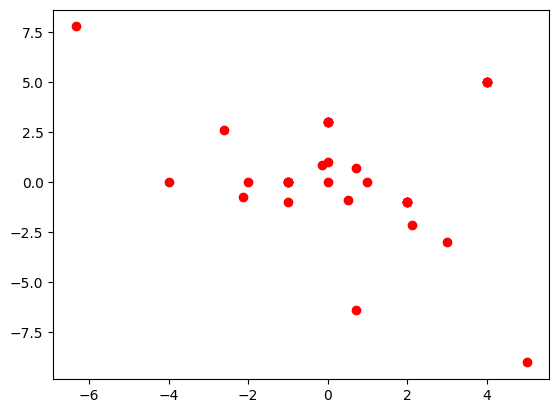

In [19]:
from math import sin, cos, pi

import matplotlib.pyplot as plt

class Rotater(TwoByNMatrix):
    def __init__(self, angle_in_radians: int|float):
        """create a rotational matrix
        angle should be in radians"""
        try:
            angle_in_radians = float(angle_in_radians)
        except TypeError:
            raise TypeError(f"Expected angle to be int or float, got '{type(angle_in_radians)}' instead")
        self.__row1 = [cos(angle_in_radians), -sin(angle_in_radians)]
        self.__row2 = [sin(angle_in_radians), sin(angle_in_radians)]
        self.__rowlen = 2

    @property
    def row1(self): return self.__row1
    @property
    def row2(self): return self.__row2
    @property
    def rowlen(self): return self.__rowlen

point_set_original = {(-1, 0), (2, -1), (4, 5), (0, 3)}
point_set = {TwoByNMatrix([[a],[b]]) for a, b in point_set_original}
org_x, org_y = [i[0] for i in point_set_original], [i[1] for i in point_set_original]
for angle in {-pi/2, -3*pi/4, 2*pi/3, pi}:
    rotater = Rotater(angle)
    rotated_point_set = {rotater * point for point in point_set}
    x, y = org_x+[i.row1[0] for i in rotated_point_set], org_y+[i.row2[0] for i in rotated_point_set]
    plt.plot(x, y, 'ro')

    

